In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/nghiatnh/Study/Sem5/AIL302m/Projects/AIL302m-Machine_Learning/')
from Modules.classification.multi_layer_perceptron import MultilayerPerceptron

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j


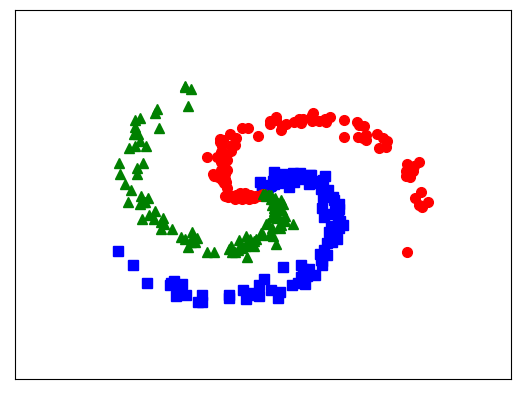

In [3]:
# lets visualize the data:

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()


In [4]:

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

clf = MultilayerPerceptron(max_iter=10000000, tol=1e-4)
clf.fit(X.T, y.T)

(300,)
iter 1000, loss: 1.081661
iter 2000, loss: 0.896433
iter 3000, loss: 0.729613
iter 4000, loss: 0.697723
iter 5000, loss: 0.687780
iter 6000, loss: 0.680859
iter 7000, loss: 0.674568
iter 8000, loss: 0.668069
iter 9000, loss: 0.660750
iter 10000, loss: 0.651569
iter 11000, loss: 0.639609
iter 12000, loss: 0.624247
iter 13000, loss: 0.605199
iter 14000, loss: 0.581973
iter 15000, loss: 0.554414
iter 16000, loss: 0.522864
iter 17000, loss: 0.488840
iter 18000, loss: 0.454294
iter 19000, loss: 0.421189
iter 20000, loss: 0.391099
iter 21000, loss: 0.364837
iter 22000, loss: 0.342638
iter 23000, loss: 0.323762
iter 24000, loss: 0.307641
iter 25000, loss: 0.293655
iter 26000, loss: 0.281516
iter 27000, loss: 0.270752
iter 28000, loss: 0.260979
iter 29000, loss: 0.252036
iter 30000, loss: 0.244001
iter 31000, loss: 0.236412
iter 32000, loss: 0.229362
iter 33000, loss: 0.222764
iter 34000, loss: 0.216500
iter 35000, loss: 0.210527
iter 36000, loss: 0.204850
iter 37000, loss: 0.199443
ite

[1 1 1 1 1 1 1 1 1 1]
[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


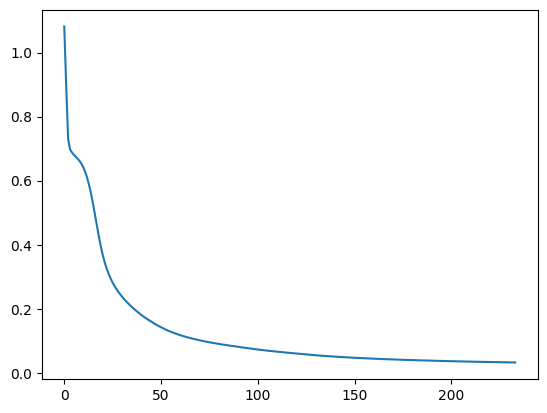

In [5]:
print(clf.predict(X[:,120:130].T))
print(Y[:,120:130].T)
plt.plot(range(len(clf.loss_curve_)), clf.loss_curve_)
plt.show()

In [6]:
print("accuracy: {} %".format(clf.score(X.T, y) * 100))

accuracy: 99.33333333333333 %
